## DIA 012: Aumento de Datos (Data Augmentation) en CNN con TensorFlow y Keras

El aumento de datos es una técnica poderosa para mejorar la generalizacion del modelo y prevenir el overfitting (sobre entrenamiento), especialmente cuando se trabaja con dataset limitados

In [1]:
# 1. Library import
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# 2. Data loading and preprocessing
# Loading the MNIST dataset
mnist = tf.keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Nomralize pixel values from 0-255 to 0-1
X_train, X_test = X_train/255.0, X_test/255.0

# Reshape
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))


# Verification of Data Form
print("X_train form: ",X_train.shape)
print("y_train form: ", y_train.shape)
print("X_test form: ", X_test.shape)
print("y_test form: ", y_test.shape)

X_train form:  (60000, 28, 28, 1)
y_train form:  (60000,)
X_test form:  (10000, 28, 28, 1)
y_test form:  (10000,)


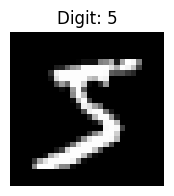

In [8]:
# 3. Data visualization
# Function to display images
def display_image(matriz, tags, index):
    plt.figure(figsize=(2,2))
    plt.imshow(matriz[index].reshape(28, 28), cmap='gray')
    plt.title(f"Digit: {tags[index]}")
    plt.axis('off')
    plt.show

# Display the first image of the training set}
display_image(X_train, y_train, 0)

In [9]:
# 4. Building the CNN model
# Create the model using Keras Sequential API
model = models.Sequential([
    # First convolutional layer
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    # Second convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    # Third convolutional layer
    layers.Conv2D(64, (3, 3), activation='relu'),

    # Flattening layer
    layers.Flatten(),

    # Dense layer
    layers.Dense(64, activation='relu'),

    # Output layer
    layers.Dense(10, activation='softmax')
])

# Model summary
model.summary()

c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
# 5. Model compilation
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [11]:
# 6. Configuring Data Augmentation
# Create an image generator with data augmentation
datagen = ImageDataGenerator(
    rotation_range=10, # Random image rotation in a range of 10 degrees
    width_shift_range=0.1, # Horizontal shift
    height_shift_range=0.1, # Vertical shift
    zoom_range=0.1 # Random zoom
    )

# Fit the generator to the training data
datagen.fit(X_train)

In [12]:
# 7. Training model with data augmentation
# Implement Early Stopping to prevent overfitting
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model using the data generator
history = model.fit(datagen.flow(X_train, y_train, batch_size=64),
 epochs=20,
 validation_data=(X_test, y_test),
 callbacks=[early_stop])

Epoch 1/20


c:\Users\LENOVO\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7759 - loss: 0.6719 - val_accuracy: 0.9804 - val_loss: 0.0585
Epoch 2/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.9620 - loss: 0.1230 - val_accuracy: 0.9892 - val_loss: 0.0346
Epoch 3/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9753 - loss: 0.0808 - val_accuracy: 0.9897 - val_loss: 0.0351
Epoch 4/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9781 - loss: 0.0722 - val_accuracy: 0.9891 - val_loss: 0.0315
Epoch 5/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9816 - loss: 0.0573 - val_accuracy: 0.9935 - val_loss: 0.0206
Epoch 6/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9840 - loss: 0.0508 - val_accuracy: 0.9918 - val_loss: 0.0273
Epoch 7/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9854 - loss: 0.0469 - val_accuracy: 0.9926 - val_loss: 0.0208
Epoch 8/20
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9871 - loss: 0.0422 - val_accuracy: 0.9942 

In [13]:
# 8. Model Evaluation
# Evaluate performance on the test set
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f'\nAccuracy on test set: {test_acc:.4f}')

313/313 - 0s - 1ms/step - accuracy: 0.9942 - loss: 0.0186

Accuracy on test set: 0.9942


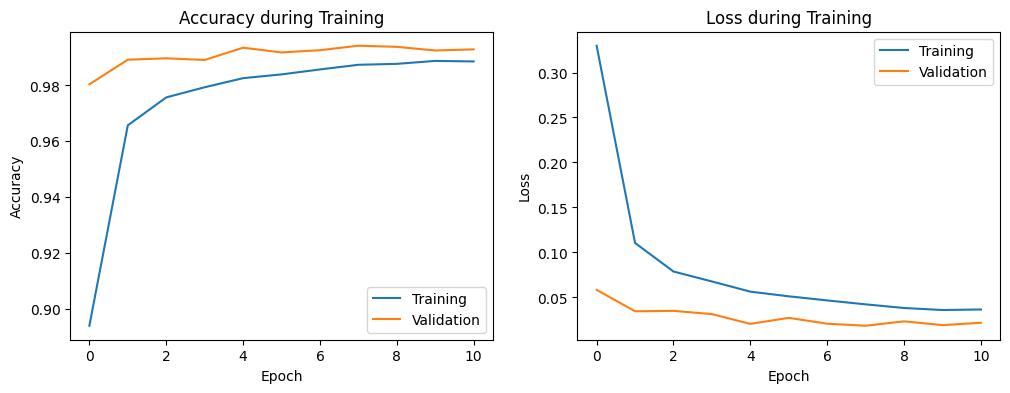

In [17]:

# 9. Visualizing Model Performance

# Plotting accuracy and loss during training
plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], label='Validation')
plt.title('Accuracy during Training')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training')
plt.plot(history.history['val_loss'], label='Validation')
plt.title('Loss during Training')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [18]:
# 10. Saving and Loading the Model


# a. Saving the entire model to an H5 file
model.save('model_cnn_mnist_augmented.h5')
print("Model saved as 'model_cnn_mnist_augmented.h5'")

# b. Loading the saved model
new_model = tf.keras.models.load_model('model_cnn_mnist_augmented.h5')
print("Model loaded successfully.")

Model saved as 'model_cnn_mnist_augmented.h5'
Model loaded successfully.


313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
Actual label: 7
Prediction: 7
Probabilities: [1.6660255e-08 6.1971718e-06 2.3727196e-04 2.2590264e-06 1.4142332e-06
 8.9759196e-09 3.1224434e-10 9.9974674e-01 2.2342224e-06 3.7745122e-06]


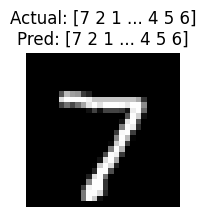

In [20]:
# 11. Making Predictions with the Loaded Model

# a. Making predictions on the test set
predictions = new_model.predict(X_test)

# b. Display prediction for the first image in the test set
index = 0
print(f"Actual label: {y_test[index]}")
print(f"Prediction: {np.argmax(predictions[index])}")
print(f"Probabilities: {predictions[index]}")

# c. Display the image with its prediction
def show_prediction(array, actual_label, prediction, index):
    plt.figure(figsize=(2,2))
    plt.imshow(array[index].reshape(28, 28), cmap='gray')
    plt.title(f"Actual: {actual_label}\nPred: {prediction}")
    plt.axis('off')
    plt.show()

# Display the first image in the test set with its prediction
show_prediction(X_test, y_test, np.argmax(predictions, axis=1), index)